In [36]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
file = "airline-safety.csv"

In [3]:
#read airline safety file 
air_df = pd.read_csv(file)

In [4]:
air_df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [5]:
air_df.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

In [6]:
air_df.dtypes

airline                   object
avail_seat_km_per_week     int64
incidents_85_99            int64
fatal_accidents_85_99      int64
fatalities_85_99           int64
incidents_00_14            int64
fatal_accidents_00_14      int64
fatalities_00_14           int64
dtype: object

In [7]:
air_df.count()

airline                   56
avail_seat_km_per_week    56
incidents_85_99           56
fatal_accidents_85_99     56
fatalities_85_99          56
incidents_00_14           56
fatal_accidents_00_14     56
fatalities_00_14          56
dtype: int64

In [8]:
air_df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [9]:
#Divide all incidents by avail_seat_km_week
seat = air_df["avail_seat_km_per_week"]

inc_old = air_df["incidents_85_99"]/seat
inc_fat_old = air_df["fatal_accidents_85_99"]/seat
fatal_old = air_df["fatalities_85_99"]/seat

inc_new = air_df["incidents_00_14"]/seat
inc_fat_new = air_df["fatal_accidents_00_14"]/seat
fatal_new = air_df["fatalities_00_14"]/seat

In [10]:
#add the above calculations to the dataframe
air_df["inc_old"] = inc_old
air_df["inc_fat_old"] = inc_fat_old
air_df["fatal_old"] = fatal_old

air_df["inc_new"] = inc_new
air_df["inc_fat_new"] = inc_fat_new
air_df["fatal_new"] = fatal_new

In [11]:
air_df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,inc_old,inc_fat_old,fatal_old,inc_new,inc_fat_new,fatal_new
0,Aer Lingus,320906734,2,0,0,0,0,0,6.232340e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Aeroflot*,1197672318,76,14,128,6,1,88,6.345642e-08,1.168934e-08,1.068740e-07,5.009718e-09,8.349529e-10,7.347586e-08
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,1.555195e-08,0.000000e+00,0.000000e+00,2.591992e-09,0.000000e+00,0.000000e+00
3,Aeromexico*,596871813,3,1,64,5,0,0,5.026205e-09,1.675402e-09,1.072257e-07,8.377008e-09,0.000000e+00,0.000000e+00
4,Air Canada,1865253802,2,0,0,2,0,0,1.072240e-09,0.000000e+00,0.000000e+00,1.072240e-09,0.000000e+00,0.000000e+00


In [12]:
air_df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,inc_old,inc_fat_old,fatal_old,inc_new,inc_fat_new,fatal_new
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857,7.914750e-09,2.341704e-09,1.297227e-07,4.119550e-09,8.346234e-10,6.478658e-08
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751,1.113581e-08,3.029792e-09,1.919357e-07,4.687558e-09,1.511233e-09,1.673300e-07
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.467709e-09,0.000000e+00,0.000000e+00,1.023060e-09,0.000000e+00,0.000000e+00
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000,4.442380e-09,1.296613e-09,3.558271e-08,2.934002e-09,0.000000e+00,0.000000e+00
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000,8.614085e-09,2.869618e-09,1.832819e-07,5.052160e-09,1.064526e-09,3.769197e-08
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000,6.345642e-08,1.168934e-08,8.137607e-07,2.868921e-08,7.209421e-09,1.020133e-06


In [13]:
#show the airlines with the most number of fatalities for both periods
air_df_sort_new = air_df.sort_values("fatalities_00_14", ascending=False)

In [14]:
air_df_sort_new.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,inc_old,inc_fat_old,fatal_old,inc_new,inc_fat_new,fatal_new
34,Malaysia Airlines,1039171244,3,1,34,3,2,537,2.886916e-09,9.623053e-10,3.271838e-08,2.886916e-09,1.924611e-09,5.167579e-07
11,American*,5228357340,21,5,101,17,3,416,4.016558e-09,9.563233e-10,1.931773e-08,3.251499e-09,5.737940e-10,7.956610e-08
5,Air France,3004002661,14,4,79,6,2,337,4.660449e-09,1.331557e-09,2.629825e-08,1.997335e-09,6.657784e-10,1.121837e-07
29,Kenya Airways,277414794,2,0,0,2,2,283,7.209421e-09,0.000000e+00,0.000000e+00,7.209421e-09,7.209421e-09,1.020133e-06
16,China Airlines,813216487,12,6,535,2,1,225,1.475622e-08,7.378109e-09,6.578814e-07,2.459370e-09,1.229685e-09,2.766791e-07


In [15]:
air_df_sort_old = air_df.sort_values("fatalities_85_99", ascending=False)

In [16]:
air_df_sort_old.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,inc_old,inc_fat_old,fatal_old,inc_new,inc_fat_new,fatal_new
16,China Airlines,813216487,12,6,535,2,1,225,1.475622e-08,7.378109e-09,6.578814e-07,2.459370e-09,1.229685e-09,2.766791e-07
28,Japan Airlines,1574217531,3,1,520,0,0,0,1.905709e-09,6.352362e-10,3.303228e-07,0.000000e+00,0.000000e+00,0.000000e+00
31,Korean Air,1734522605,12,5,425,1,0,0,6.918330e-09,2.882638e-09,2.450242e-07,5.765275e-10,0.000000e+00,0.000000e+00
19,Delta / Northwest*,6525658894,24,12,407,24,2,51,3.677790e-09,1.838895e-09,6.236918e-08,3.677790e-09,3.064825e-10,7.815303e-09
6,Air India*,869253552,2,1,329,4,1,158,2.300825e-09,1.150412e-09,3.784857e-07,4.601649e-09,1.150412e-09,1.817651e-07


Text(0.5,1,'Future Fatalities v Past Fatalities')

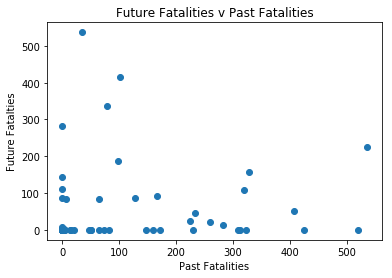

In [17]:
#scatter plot of future fatalities versus past fatalities
x_axis = air_df["fatalities_85_99"]
y_axis = air_df["fatalities_00_14"]
plt.scatter(x_axis, y_axis)
plt.ylabel("Future Fatalties")
plt.xlabel("Past Fatalities")
plt.title("Future Fatalities v Past Fatalities")

In [18]:
#From our initial plot of pure numbers of fatalities, there appears to be no correlation between
#an airline's past and future performance.
#An exception might be China Airlines, which had 535 fatalities from 85-99 and 225 fatalities from 00-14.

(-1e-08, 5e-07)

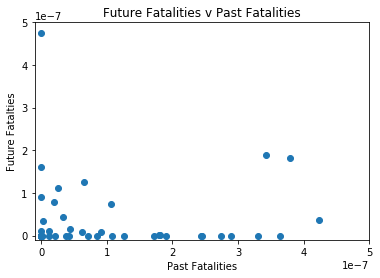

In [19]:
#scatter plot of future fatalities versus past fatalities, accounting for seat kilometers
x_axis = air_df["fatal_old"]
y_axis = air_df["fatal_new"]
plt.scatter(x_axis, y_axis, vmax=.000001, vmin = 0)
plt.ylabel("Future Fatalties")
plt.xlabel("Past Fatalities")
plt.title("Future Fatalities v Past Fatalities")
plt.xlim(-.00000001,.0000005)
plt.ylim(-.00000001,.0000005)

In [20]:
air_df_sort_seat_new = air_df.sort_values("fatal_new", ascending=False)

In [21]:
air_df_sort_seat_new

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,inc_old,inc_fat_old,fatal_old,inc_new,inc_fat_new,fatal_new
29,Kenya Airways,277414794,2,0,0,2,2,283,7.209421e-09,0.000000e+00,0.000000e+00,7.209421e-09,7.209421e-09,1.020133e-06
34,Malaysia Airlines,1039171244,3,1,34,3,2,537,2.886916e-09,9.623053e-10,3.271838e-08,2.886916e-09,1.924611e-09,5.167579e-07
25,Gulf Air,301379762,1,0,0,3,1,143,3.318073e-09,0.000000e+00,0.000000e+00,9.954218e-09,3.318073e-09,4.744844e-07
16,China Airlines,813216487,12,6,535,2,1,225,1.475622e-08,7.378109e-09,6.578814e-07,2.459370e-09,1.229685e-09,2.766791e-07
22,Ethiopian Airlines,488560643,25,5,167,5,2,92,5.117072e-08,1.023414e-08,3.418204e-07,1.023414e-08,4.093658e-09,1.883083e-07
6,Air India*,869253552,2,1,329,4,1,158,2.300825e-09,1.150412e-09,3.784857e-07,4.601649e-09,1.150412e-09,1.817651e-07
39,SAS*,682971852,5,0,0,6,1,110,7.320946e-09,0.000000e+00,0.000000e+00,8.785135e-09,1.464189e-09,1.610608e-07
35,Pakistan International,348563137,8,3,234,10,2,46,2.295137e-08,8.606762e-09,6.713274e-07,2.868921e-08,5.737841e-09,1.319704e-07
47,TAM,1509195646,8,3,98,7,2,188,5.300837e-09,1.987814e-09,6.493525e-08,4.638232e-09,1.325209e-09,1.245697e-07
5,Air France,3004002661,14,4,79,6,2,337,4.660449e-09,1.331557e-09,2.629825e-08,1.997335e-09,6.657784e-10,1.121837e-07


In [22]:
# next we look at total number of incidents, regardless if fatalities were involved.

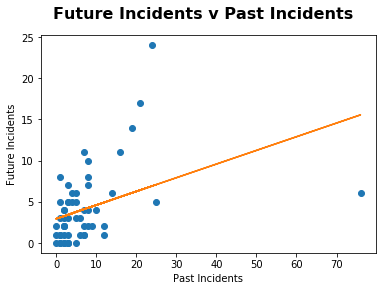

In [23]:
#linear regression
x_axis = air_df["incidents_85_99"]
y_axis = air_df["incidents_00_14"]

slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Future Incidents v Past Incidents", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel("Past Incidents")
ax.set_ylabel("Future Incidents")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit)

plt.show()

In [24]:
p_value

0.0020730165648094167

In [25]:
#The p-value indicates there is a strong correlation between number of past incidents and number of future incidents.

In [26]:
#look at airlines with the most overall incidents
total_inc = air_df["incidents_85_99"]+air_df["incidents_00_14"]
total_inc_seat = air_df["inc_old"]+air_df["inc_new"]

In [27]:
air_df["total_inc"] = total_inc
air_df["total_inc_seat"] = total_inc_seat

In [28]:
air_df.sort_values("total_inc", ascending=False)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,inc_old,inc_fat_old,fatal_old,inc_new,inc_fat_new,fatal_new,total_inc,total_inc_seat
1,Aeroflot*,1197672318,76,14,128,6,1,88,6.345642e-08,1.168934e-08,1.068740e-07,5.009718e-09,8.349529e-10,7.347586e-08,82,6.846614e-08
19,Delta / Northwest*,6525658894,24,12,407,24,2,51,3.677790e-09,1.838895e-09,6.236918e-08,3.677790e-09,3.064825e-10,7.815303e-09,48,7.355579e-09
11,American*,5228357340,21,5,101,17,3,416,4.016558e-09,9.563233e-10,1.931773e-08,3.251499e-09,5.737940e-10,7.956610e-08,38,7.268057e-09
51,United / Continental*,7139291291,19,8,319,14,2,109,2.661329e-09,1.120559e-09,4.468231e-08,1.960979e-09,2.801399e-10,1.526762e-08,33,4.622308e-09
22,Ethiopian Airlines,488560643,25,5,167,5,2,92,5.117072e-08,1.023414e-08,3.418204e-07,1.023414e-08,4.093658e-09,1.883083e-07,30,6.140486e-08
52,US Airways / America West*,2455687887,16,7,224,11,2,23,6.515486e-09,2.850525e-09,9.121680e-08,4.479397e-09,8.144357e-10,9.366011e-09,27,1.099488e-08
5,Air France,3004002661,14,4,79,6,2,337,4.660449e-09,1.331557e-09,2.629825e-08,1.997335e-09,6.657784e-10,1.121837e-07,20,6.657784e-09
40,Saudi Arabian,859673901,7,2,313,11,0,0,8.142622e-09,2.326464e-09,3.640915e-07,1.279555e-08,0.000000e+00,0.000000e+00,18,2.093817e-08
35,Pakistan International,348563137,8,3,234,10,2,46,2.295137e-08,8.606762e-09,6.713274e-07,2.868921e-08,5.737841e-09,1.319704e-07,18,5.164057e-08
50,Turkish Airlines,1946098294,8,3,64,8,2,84,4.110789e-09,1.541546e-09,3.288631e-08,4.110789e-09,1.027697e-09,4.316329e-08,16,8.221579e-09


In [29]:
air_df.sort_values("total_inc_seat", ascending=False)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,inc_old,inc_fat_old,fatal_old,inc_new,inc_fat_new,fatal_new,total_inc,total_inc_seat
1,Aeroflot*,1197672318,76,14,128,6,1,88,6.345642e-08,1.168934e-08,1.068740e-07,5.009718e-09,8.349529e-10,7.347586e-08,82,6.846614e-08
22,Ethiopian Airlines,488560643,25,5,167,5,2,92,5.117072e-08,1.023414e-08,3.418204e-07,1.023414e-08,4.093658e-09,1.883083e-07,30,6.140486e-08
35,Pakistan International,348563137,8,3,234,10,2,46,2.295137e-08,8.606762e-09,6.713274e-07,2.868921e-08,5.737841e-09,1.319704e-07,18,5.164057e-08
38,Royal Air Maroc,295705339,5,3,51,3,0,0,1.690872e-08,1.014523e-08,1.724690e-07,1.014523e-08,0.000000e+00,0.000000e+00,8,2.705396e-08
55,Xiamen Airlines,430462962,9,1,82,2,0,0,2.090772e-08,2.323080e-09,1.904926e-07,4.646160e-09,0.000000e+00,0.000000e+00,11,2.555388e-08
24,Garuda Indonesia,613356665,10,3,260,4,2,22,1.630373e-08,4.891118e-09,4.238969e-07,6.521491e-09,3.260746e-09,3.586820e-08,14,2.282522e-08
36,Philippine Airlines,413007158,7,4,74,2,1,1,1.694886e-08,9.685062e-09,1.791737e-07,4.842531e-09,2.421266e-09,2.421266e-09,9,2.179139e-08
20,Egyptair,557699891,8,3,282,4,1,14,1.434463e-08,5.379237e-09,5.056483e-07,7.172316e-09,1.793079e-09,2.510311e-08,12,2.151695e-08
40,Saudi Arabian,859673901,7,2,313,11,0,0,8.142622e-09,2.326464e-09,3.640915e-07,1.279555e-08,0.000000e+00,0.000000e+00,18,2.093817e-08
44,Sri Lankan / AirLanka,325582976,2,1,14,4,0,0,6.142827e-09,3.071414e-09,4.299979e-08,1.228565e-08,0.000000e+00,0.000000e+00,6,1.842848e-08


In [30]:
#The top three airlines with the worst track records for the entire period
#are Aeroflot, Ethiopean Airlines, and Pakistan International.

In [31]:
#create bar chart of the worst offenders
air_df_bar = air_df.sort_values("total_inc_seat", ascending=False)

In [32]:
air_df_bar2 = air_df_bar.head()

In [33]:
air_df_bar2

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,inc_old,inc_fat_old,fatal_old,inc_new,inc_fat_new,fatal_new,total_inc,total_inc_seat
1,Aeroflot*,1197672318,76,14,128,6,1,88,6.345642e-08,1.168934e-08,1.068740e-07,5.009718e-09,8.349529e-10,7.347586e-08,82,6.846614e-08
22,Ethiopian Airlines,488560643,25,5,167,5,2,92,5.117072e-08,1.023414e-08,3.418204e-07,1.023414e-08,4.093658e-09,1.883083e-07,30,6.140486e-08
35,Pakistan International,348563137,8,3,234,10,2,46,2.295137e-08,8.606762e-09,6.713274e-07,2.868921e-08,5.737841e-09,1.319704e-07,18,5.164057e-08
38,Royal Air Maroc,295705339,5,3,51,3,0,0,1.690872e-08,1.014523e-08,1.724690e-07,1.014523e-08,0.000000e+00,0.000000e+00,8,2.705396e-08
55,Xiamen Airlines,430462962,9,1,82,2,0,0,2.090772e-08,2.323080e-09,1.904926e-07,4.646160e-09,0.000000e+00,0.000000e+00,11,2.555388e-08


In [34]:
y_axis = air_df_bar2['total_inc_seat']

In [38]:
x_axis = np.arange(len(y_axis))

In [39]:
x_axis

array([0, 1, 2, 3, 4])

Text(0.5,0,'Airline')

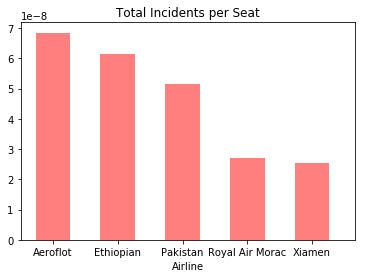

In [53]:
x_pos = [0,1.5,3,4.5,6]
plt.bar(x_pos, y_axis, color='r', alpha=0.50, align="center")
tick_locations = [value for value in x_pos]
plt.xticks(tick_locations, ["Aeroflot", "Ethiopian", "Pakistan", "Royal Air Morac", "Xiamen"])
plt.xlim(-0.75, len(x_axis)+2)
plt.title("Total Incidents per Seat")
plt.xlabel("Airline")